In [2]:
%matplotlib

Using matplotlib backend: MacOSX


In [3]:
import mne
from pprint import pprint
import json
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

In [4]:
"""
## TESTING LOOP
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"

print(root_data_path)

sub_id = 16

n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))
#n_epoch_LDT = n_epoch_LDTfile.load_data().get_data()

#print(n_epoch_LDTfile.info)
n_epoch_LDT.pick('mag')
print(type(n_epoch_LDT))
"""

'\n## TESTING LOOP\nroot_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")\nmeg_data_path = root_data_path / "LTTC_MEG_ALL_results"\n\nprint(root_data_path)\n\nsub_id = 16\n\nn_epoch_LDT = mne.read_epochs(meg_data_path / Path(\'S%.3d_ICAed_LDT-epo.fif\' %sub_id))\n#n_epoch_LDT = n_epoch_LDTfile.load_data().get_data()\n\n#print(n_epoch_LDTfile.info)\nn_epoch_LDT.pick(\'mag\')\nprint(type(n_epoch_LDT))\n'

In [5]:
## TESTING LOOP
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"

print(root_data_path)

tmp_sub_epochsLIST = []
all_sub_epochsLIST = []

for idINT in range(9, 17):
    sub_id = idINT

    n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))
    #n_epoch_LDT = n_epoch_LDTfile.load_data().get_data()

    #print(n_epoch_LDTfile.info)
    n_epoch_LDT.pick('mag')
    tmp_sub_epochsLIST.extend([n_epoch_LDT])
    all_sub_epochsLIST = mne.concatenate_epochs(tmp_sub_epochsLIST)
all_sub_epochsLIST

/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG
Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S009_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S010_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
233 matching e

Number of events,952
Events,Control: 476High_CD: 237Low_CD: 239
Time range,-0.100 – 0.700 sec
Baseline,-0.100 – 0.000 sec


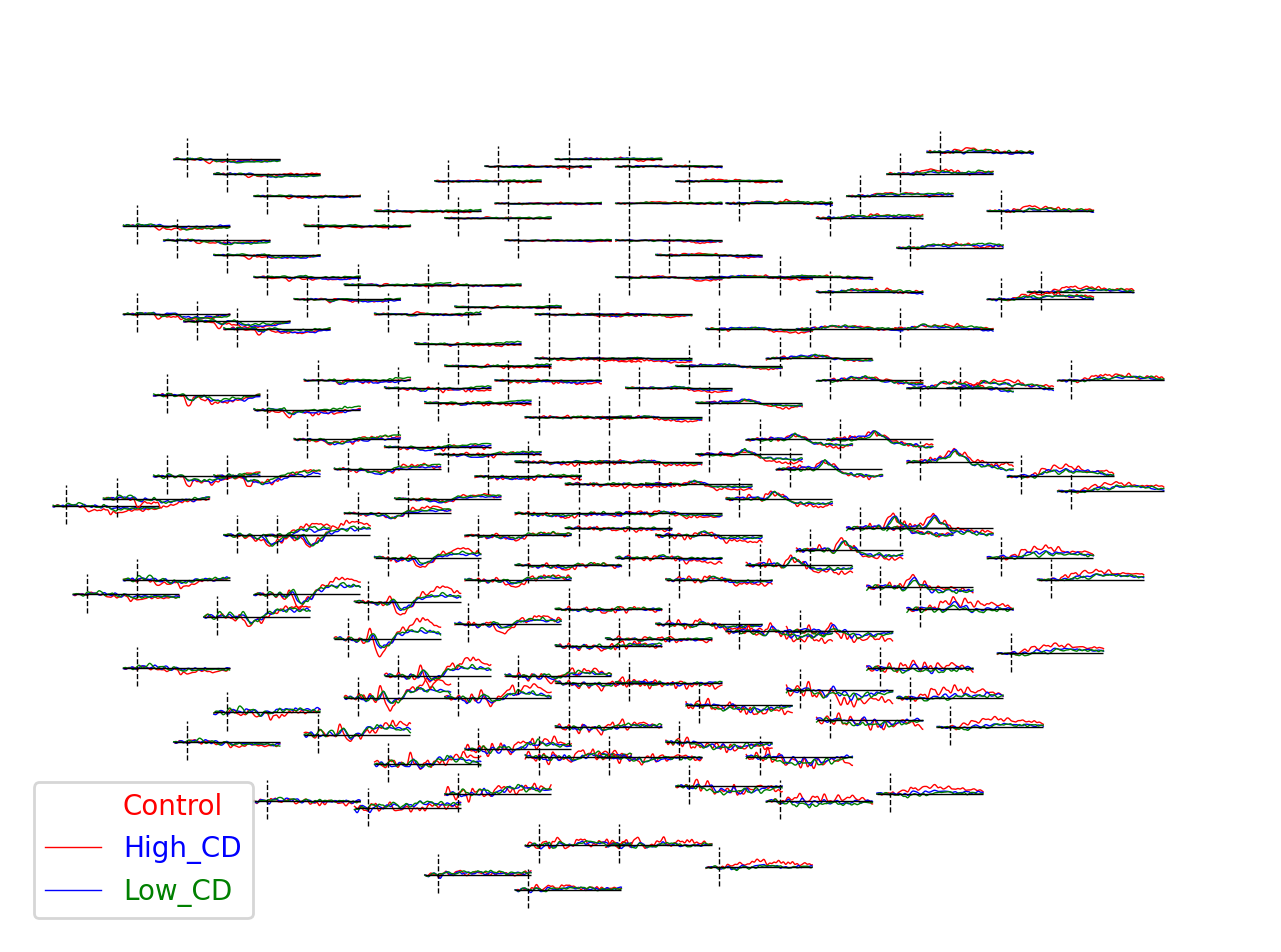

In [7]:
evoked_C = n_epoch_LDT["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_C, evoked_H, evoked_L] # [evoked_H, evoked_L]
colors = 'red', 'blue', 'green'  #C:'red'H:'blue'; L:'green';   # 'blue', 'green'
mne.viz.plot_evoked_topo(tmp, color = colors)

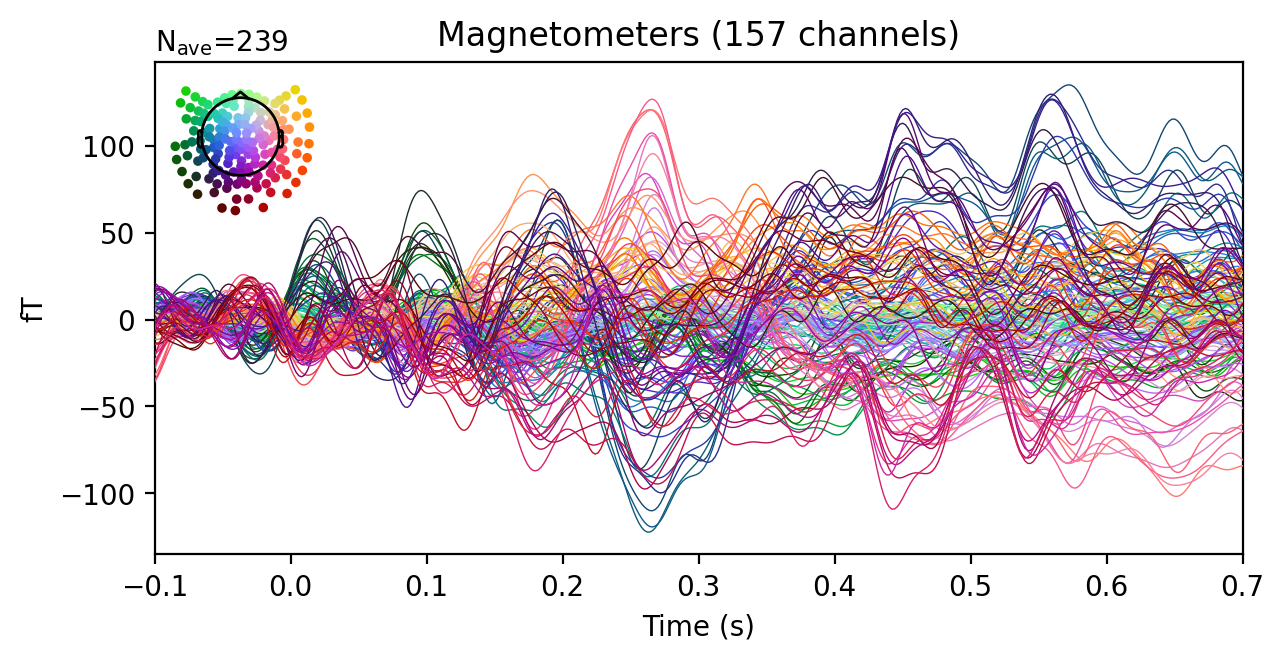

In [6]:
evoked_C = n_epoch_LDT["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

evoked_C.plot()
evoked_H.plot()
evoked_L.plot()

In [ ]:
times = np.linspace(0.05, 0.13, 5)
evks['aud/left'].plot_topomap(ch_type='mag', times=times, colorbar=True)